In [10]:
from tensorflow.keras.applications import EfficientNetV2M
model = EfficientNetV2M(weights='imagenet')

In [11]:
model.summary()

Model: "efficientnetv2-m"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 480, 480,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 480, 480,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 240, 240,  │        648 │ rescaling_1[0][0] │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 240, 240,  │         96 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 240, 240,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 240, 240,  │      5,184 │ stem_activation[… │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 240, 240,  │         96 │ block1a_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 240, 240,  │          0 │ block1a_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_add (Add)   │ (None, 240, 240,  │          0 │ block1a_project_… │
│                     │ 24)               │            │ stem_activation[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 240, 240,  │      5,184 │ block1a_add[0][0] │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 240, 240,  │         96 │ block1b_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 240, 240,  │          0 │ block1b_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 240, 240,  │          0 │ block1b_project_… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 240, 240,  │          0 │ block1b_drop[0][… │
│                     │ 24)               │            │ block1a_add[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_co… │ (None, 240, 240,  │      5,184 │ block1b_add[0][0] │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_bn  │ (None, 240, 240,  │         96 │ block1c_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_ac… │ (None, 240, 240,  │          0 │ block1c_project_

 Total params: 54,431,388 (207.64 MB)

 Trainable params: 54,139,356 (206.53 MB)

 Non-trainable params: 292,032 (1.11 MB)

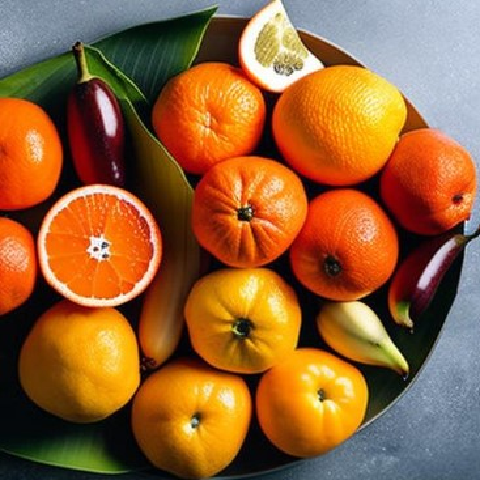

In [17]:
from tensorflow.keras.preprocessing.image import load_img
unknown_img = load_img('/content/unknown_vgg.jpg', target_size=(480, 480))
unknown_img

In [18]:
from tensorflow.keras.preprocessing.image import img_to_array
unknown_array = img_to_array(unknown_img)
unknown_array.shape

(480, 480, 3)

In [22]:
unknown_array = unknown_array.reshape((1, 480, 480, 3))
unknown_array.shape

(1, 480, 480, 3)

In [23]:
from tensorflow.keras.applications.vgg16 import preprocess_input
unknown_array = preprocess_input(unknown_array)

In [24]:
result = model.predict(unknown_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 34s 34s/step


In [25]:
result

array([[4.22050070e-04, 3.95843643e-04, 8.11251230e-05, 1.30028449e-04,
        1.23915161e-04, 2.37495449e-04, 1.81741183e-04, 1.14896015e-04,
        1.36800096e-04, 2.33170111e-04, 3.00538464e-04, 3.14685225e-04,
        1.89739963e-04, 3.12737597e-04, 1.30976885e-04, 3.51520081e-04,
        1.87665035e-04, 1.33749782e-04, 1.62203432e-04, 1.67714767e-04,
        3.18106177e-04, 1.59492731e-04, 1.63298988e-04, 1.22342215e-04,
        1.37398471e-04, 1.31174020e-04, 3.62348917e-04, 2.39736575e-04,
        3.72797076e-04, 2.12394007e-04, 1.34357600e-04, 1.91215164e-04,
        1.46661972e-04, 1.28109474e-04, 1.19019023e-04, 1.22383455e-04,
        1.95283530e-04, 9.88130487e-05, 2.46814656e-04, 1.12042428e-04,
        2.68353848e-04, 1.55181435e-04, 1.77762995e-04, 2.96398968e-04,
        2.22414397e-04, 1.23417398e-04, 1.20851859e-04, 1.80944204e-04,
        6.96995849e-05, 1.40205317e-04, 2.25832686e-04, 2.16523200e-04,
        1.83448225e-04, 2.52079364e-04, 7.74522923e-05, 1.354916

In [26]:
from tensorflow.keras.applications.vgg16 import decode_predictions
decode_predictions(result)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n03347037', 'fire_screen', np.float32(0.2687333)),
  ('n04209239', 'shower_curtain', np.float32(0.08590137)),
  ('n03000134', 'chainlink_fence', np.float32(0.063537195)),
  ('n04589890', 'window_screen', np.float32(0.030860662)),
  ('n04591157', 'Windsor_tie', np.float32(0.028734416))]]

In [27]:
from tensorflow.keras import utils
utils.set_random_seed(0)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.25)

In [32]:
train_generator = datagen.flow_from_directory(
        '/content/drive/MyDrive/data_train',
        subset='training',
        target_size=(256, 256),
        batch_size=64)

Found 380 images belonging to 2 classes.


In [33]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

In [34]:
val_generator = datagen.flow_from_directory(
        '/content/drive/MyDrive/data_train',
        subset='validation',
        target_size=(256, 256),
        batch_size=64)

Found 126 images belonging to 2 classes.


In [35]:
test_generator = datagen.flow_from_directory(
        '/content/drive/MyDrive/data_test',
        target_size=(256, 256),
        batch_size=64)

Found 44 images belonging to 2 classes.


In [36]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg16_without_fc = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [37]:
vgg16_without_fc.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
from tensorflow.keras.models import Sequential
model = Sequential()
for layer in vgg16_without_fc.layers:
    model.add(layer)

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
for layer in model.layers:
    layer.trainable = False

In [41]:
from tensorflow.keras.layers import Flatten, Dense
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,104,066 (88.14 MB)

 Trainable params: 8,389,378 (32.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [43]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 185s 27s/step - accuracy: 0.5992 - loss: 2.9945 - val_accuracy: 0.6984 - val_loss: 1.3764
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 710ms/step - accuracy: 0.8195 - loss: 0.7408 - val_accuracy: 0.8889 - val_loss: 0.3206
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 717ms/step - accuracy: 0.9332 - loss: 0.2678 - val_accuracy: 0.9444 - val_loss: 0.2496
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 765ms/step - accuracy: 0.9809 - loss: 0.1243 - val_accuracy: 0.9365 - val_loss: 0.1274
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 694ms/step - accuracy: 0.9939 - loss: 0.0256 - val_accuracy: 0.9365 - val_loss: 0.1194


<Axes: >

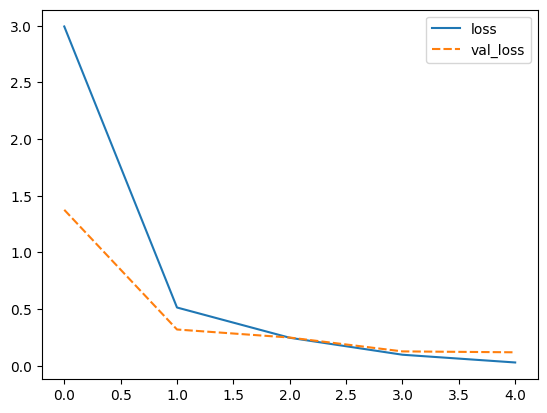

In [45]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame(history.history)
sns.lineplot(data=df[['loss', 'val_loss']])

<Axes: >

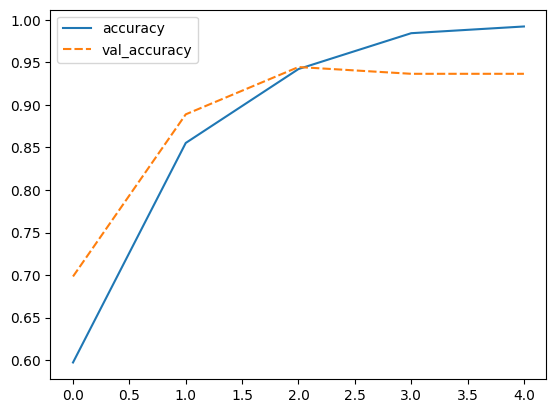

In [46]:
sns.lineplot(data=df[['accuracy', 'val_accuracy']])

In [47]:
model.evaluate(test_generator)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - accuracy: 0.8636 - loss: 0.2673


[0.2672803997993469, 0.8636363744735718]

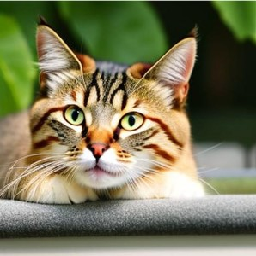

In [48]:
from tensorflow.keras.preprocessing.image import load_img
unknown_img = load_img('unknown_cat.jpg', target_size=(256, 256))
unknown_img

In [49]:
from tensorflow.keras.preprocessing.image import img_to_array

# array形式に変換
unknown_array = img_to_array(unknown_img)

# データ構造の変換
unknown_array = unknown_array.reshape((1, 256, 256, 3))

# スケーリング
unknown_array = unknown_array/255

In [50]:
model.predict(unknown_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([[1.000000e+00, 3.095134e-19]], dtype=float32)

In [51]:
from tensorflow.keras.models import save_model
save_model(model, 'model.h5')

In [52]:
from tensorflow.keras.models import load_model
loaded_model = load_model('model.h5')

In [53]:
loaded_model.predict(unknown_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


array([[1.000000e+00, 3.095134e-19]], dtype=float32)